### 《NetworkX编程实践基础》
##### 16课：图的各种矩阵

In [1]:
# !/usr/bin/python3
# -*- coding: utf-8 -*-
# Author ： 单哥的科研日常
# 示例程序所用库的版本：networkx==2.6.3

In [1]:
import networkx as nx

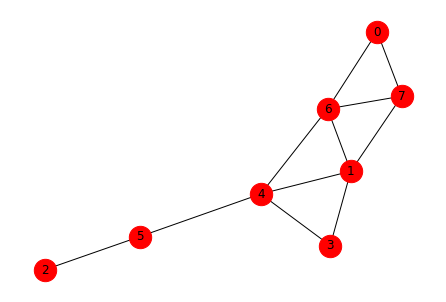

In [6]:
# 生成包含n个节点，连边概率为p的ER随机图
n, p = 8, 0.5
G = nx.erdos_renyi_graph(n, p)
nx.draw(G, node_size=500, node_color='red', with_labels=True)

In [7]:
# 邻接矩阵
As = nx.adjacency_matrix(G) 
print(As)
# 注意：对于networkx2.6以后的版本（如2.7，2.8）无法正常打印As，
# 会出现：FutureWarning: adjacency_matrix will return a
# scipy.sparse array instead of a matrix in Networkx 3.0.
# 但并不影响获取邻接矩阵。

# 转化成二维矩阵
print(As.todense())

  (0, 6)	1
  (0, 7)	1
  (1, 3)	1
  (1, 4)	1
  (1, 6)	1
  (1, 7)	1
  (2, 5)	1
  (3, 1)	1
  (3, 4)	1
  (4, 1)	1
  (4, 3)	1
  (4, 5)	1
  (4, 6)	1
  (5, 2)	1
  (5, 4)	1
  (6, 0)	1
  (6, 1)	1
  (6, 4)	1
  (6, 7)	1
  (7, 0)	1
  (7, 1)	1
  (7, 6)	1
[[0 0 0 0 0 0 1 1]
 [0 0 0 1 1 0 1 1]
 [0 0 0 0 0 1 0 0]
 [0 1 0 0 1 0 0 0]
 [0 1 0 1 0 1 1 0]
 [0 0 1 0 1 0 0 0]
 [1 1 0 0 1 0 0 1]
 [1 1 0 0 0 0 1 0]]


In [9]:
# 返回G的关联矩阵：N*M，N为节点数，M为连边数
IM = nx.incidence_matrix(G)
IM.todense()

matrix([[1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
        [1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.],
        [0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.]])

In [12]:
# 返回G的拉普拉斯矩阵
Ls = nx.laplacian_matrix(G)
# print(Ls)
L = Ls.todense()  # L = D - A，D为节点度组成的对角矩阵，A为邻接矩阵
print(L)

[[ 2  0  0  0  0  0 -1 -1]
 [ 0  4  0 -1 -1  0 -1 -1]
 [ 0  0  1  0  0 -1  0  0]
 [ 0 -1  0  2 -1  0  0  0]
 [ 0 -1  0 -1  4 -1 -1  0]
 [ 0  0 -1  0 -1  2  0  0]
 [-1 -1  0  0 -1  0  4 -1]
 [-1 -1  0  0  0  0 -1  3]]


#### 标准化的拉普拉斯矩阵如下：
$N=D^{-1 / 2} L D^{-1 / 2}$

In [14]:
# 返回G的标准化拉普拉斯矩阵
NLs = nx.normalized_laplacian_matrix(G)
NL = NLs.todense()
print(NL)

[[ 1.          0.          0.          0.          0.          0.
  -0.35355339 -0.40824829]
 [ 0.          1.          0.         -0.35355339 -0.25        0.
  -0.25       -0.28867513]
 [ 0.          0.          1.          0.          0.         -0.70710678
   0.          0.        ]
 [ 0.         -0.35355339  0.          1.         -0.35355339  0.
   0.          0.        ]
 [ 0.         -0.25        0.         -0.35355339  1.         -0.35355339
  -0.25        0.        ]
 [ 0.          0.         -0.70710678  0.         -0.35355339  1.
   0.          0.        ]
 [-0.35355339 -0.25        0.          0.         -0.25        0.
   1.         -0.28867513]
 [-0.40824829 -0.28867513  0.          0.          0.          0.
  -0.28867513  1.        ]]
